In [1]:
# # 다운그레이드 예시
# !pip install --upgrade tensorflow==2.0.0
# !pip install -U numpy==1.19.2
# !pip install -U pandas==0.23.4

In [2]:
# bash 셸로 명령어 입력하여 라이브러리 설치하기

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [903 kB]
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelea

In [3]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [4]:
import tensorflow as tf

print(tf.__version__)


2.8.2


In [5]:
# 텐서플로우 2.8 에서 2.0으로 낮춰서 실행
# 넘파이 버전 낮춰서 실행 1.18.5

In [6]:
from konlpy.tag import Okt
okt = Okt()



In [7]:
# normalize는 텍스트를 정리해줌


text = '안녕하세욬ㅋㅋㅋ 반가워요 샤릉해'
print(okt.normalize(text))


안녕하세요ㅋㅋㅋ 반가워요 사랑해


In [8]:
# phrases는 어구를 추출해줌

text = "장중 큰 변동 폭을 보이던 코스피가 사흘 만에 소폭 반등했다."
print(okt.phrases(text))




['장중', '장중 큰 변동', '장중 큰 변동 폭', '코스피', '사흘', '소폭', '소폭 반등', '변동', '반등']


In [9]:
# morphs는 형태소 단위로 출력

text = '안녕하세요. 오래간만이네요~~. 어제 재미있었어요.'
print(okt.morphs(text))    # stem, default False



['안녕하세요', '.', '오래간만', '이네요', '~~.', '어제', '재미있었어요', '.']


In [10]:
# pos는 형태소와 품사를 출력해줌

text = '안녕하세요. 오래간만이네요~~. 어제 재미있었어요.'
print(okt.pos(text)) # 형태소와 품사를 출력해줌

print(okt.pos(text, join=True))


[('안녕하세요', 'Adjective'), ('.', 'Punctuation'), ('오래간만', 'Adverb'), ('이네요', 'Verb'), ('~~.', 'Punctuation'), ('어제', 'Noun'), ('재미있었어요', 'Adjective'), ('.', 'Punctuation')]
['안녕하세요/Adjective', './Punctuation', '오래간만/Adverb', '이네요/Verb', '~~./Punctuation', '어제/Noun', '재미있었어요/Adjective', './Punctuation']


In [11]:
# nouns은 명사를 출력해줌

text = "장중 큰 변동 폭을 보이던 코스피가 사흘 만에 소폭 반등했다."
print(okt.nouns(text))


['장', '변동', '폭', '보', '코스피', '사흘', '폭', '반등']


In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 파일 불러오기
# result = pd.read_csv(r'/content/drive/MyDrive/ColabNotebooks/project/자연어/전체댓글/naver_shopping.txt')

# f = open("/content/drive/MyDrive/ColabNotebooks/project/자연어/전체댓글/naver_shopping.txt", 'r')

result = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/project/자연어/전체댓글/naver_shopping.txt', delimiter = '\t',names=['ratings','content'])

# print(result.info())
# print(result['ratings'].describe())
# print(result.iloc[0]['content']) # 0번째 내용


# reply = result['content']
# print(reply)

In [13]:
result['ratings'].describe()

count    200000.000000
mean          3.225275
std           1.645491
min           1.000000
25%           2.000000
50%           2.000000
75%           5.000000
max           5.000000
Name: ratings, dtype: float64

In [14]:
result.drop_duplicates(subset=['content'],inplace=True)

In [15]:
# print(df.columns)

print(result[['content','ratings']])

result['label'] = 2 #내용 초기값 임시로 2 설정

result['label']  = np.where(result['ratings'] >= 4, 1, result['label'])
result['label']  = np.where(result['ratings'] < 4, 0, result['label'])
# # result ratings컬럼의 값이 4보다 크면 1을 넣어라, df의 label컬럼에

print(result['label'])

                                                  content  ratings
0                                                 배공빠르고 굿        5
1                           택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고        2
2       아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...        5
3       선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...        2
4                       민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ        5
...                                                   ...      ...
199995                                    장마라그런가!!! 달지않아요        2
199996  다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...        5
199997                    로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요        5
199998                                      넘이쁘고 쎄련되보이네요~        5
199999   아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다        5

[199908 rows x 2 columns]
0         1
1         0
2         1
3         0
4         1
         ..
199995    0
199996    1
199997    1
199998    1
199999    1
Name: label, Length: 199908, dtype: i

In [16]:
# result['content'].iloc[0]
reply = result['content']


r_all=[]
for r in reply:
  r_all.append(r)

# print(r_all[0])  #전체리스트 


# # text0_posd = okt.pos(text0,norm=True,stem=True)
lines = r_all[0].split('\n') # \n을 기준으로 텍스트를 잘라서 리스트에 저장
# print(lines[0]) # 0번쨰 댓글의 0번째 라인
word_dic = {}

for r in r_all:
  lines = r.split('\n') # \n을 기준으로 텍스트를 잘라서 리스트에 저장
  for line in lines:
    # 형태소 변환
    malist = okt.pos(line,norm=True,stem=True) #리스트 안의 튜플로 넘어옴
    for word,pumsa in malist:
      if pumsa == 'Noun': # if pumsa in ['Noun','Verb']: 이런식으로도 활용 가능
        if not (word in word_dic): # word_dic 에 없을 경우
          word_dic[word]=1 #새로 만듬
        word_dic[word] +=1 # 있거나 새로 만든 이후 방에 1을 추가함



import operator # 정렬 라이브러리
word_dic = sorted(word_dic.items(), key= operator.itemgetter(1),reverse=True) #itemgetter (1)은 밸류를 기준으로 정렬하겠다는 의미


print(word_dic)

[('배송', 28478), ('구매', 15702), ('사용', 13671), ('제품', 12043), ('가격', 11591), ('그냥', 11539), ('생각', 11279), ('것', 10590), ('좀', 10205), ('주문', 9935), ('맛', 9576), ('더', 8513), ('별로', 8009), ('때', 7924), ('사이즈', 7656), ('포장', 7131), ('개', 6969), ('거', 6327), ('상품', 6055), ('냄새', 5534), ('요', 5521), ('정말', 5489), ('부분', 5401), ('안', 4776), ('하나', 4771), ('아주', 4697), ('진짜', 4636), ('조금', 4345), ('구입', 4339), ('또', 4286), ('반품', 4187), ('아이', 4011), ('느낌', 3888), ('맘', 3875), ('정도', 3827), ('완전', 3780), ('제', 3608), ('처음', 3580), ('비', 3314), ('디자인', 3288), ('사진', 3272), ('용', 3266), ('저', 3261), ('효과', 3205), ('다시', 3177), ('상태', 3140), ('선물', 3126), ('대비', 3049), ('한번', 3046), ('보고', 3015), ('추천', 3006), ('향', 2966), ('크기', 2956), ('색상', 2943), ('다른', 2886), ('이', 2835), ('교환', 2749), ('해', 2728), ('계속', 2622), ('마음', 2579), ('물건', 2578), ('가성', 2534), ('다음', 2511), ('전', 2508), ('바로', 2454), ('번', 2433), ('집', 2416), ('항상', 2399), ('박스', 2385), ('듯', 2338), ('돈', 2327), ('수', 2324), ('설치

In [17]:
print(len(word_dic))

35419


In [18]:
# tokenizer 
from tensorflow import keras
from sklearn.model_selection import train_test_split


data = result[['content','label']]

# print(data)
#데이터 분리
train_data,test_data = train_test_split(data)

# print(train_data.mean()) #0.616521


In [19]:
print(len(train_data)) # 개수 149931
print(len(test_data)) # 개수 49977
print(train_data['content'].nunique(), test_data['content'].nunique()) #1242 553



149931
49977
149931 49977


In [20]:
# 중복값 제거

train_data.drop_duplicates(subset=['content'],inplace=True)
test_data.drop_duplicates(subset=['content'],inplace=True)

In [21]:
print(len(train_data)) # 개수 4929
print(len(test_data)) # 개수 1643

149931
49977


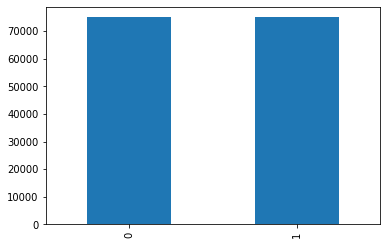

In [22]:
# label의 값별로 데이터의 수를 출력

train_data['label'].value_counts().plot(kind ='bar')

In [23]:
# label의 값으로 개수 출력
# train_data.groupby('label').size()
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,74966
1,1,74965


In [24]:
train_data.isnull().sum() , test_data.isnull().sum()

(content    0
 label      0
 dtype: int64, content    0
 label      0
 dtype: int64)

In [25]:
# 정규표현식 
import re

# 1. content 컬럼에서 중복을 제거하고 저장
# 2. null데이터의 행을 삭제
# 3. 한글만 제외하고 모두 삭제처리
train_data['content'] = train_data['content'].str.replace('[^ㄱ-하-ㅣ가-힣 ]','')
test_data['content'] = test_data['content'].str.replace('[^ㄱ-하-ㅣ가-힣 ]','')
train_data[:5]
# train_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,content,label
92887,스위치 케이스는 별로에요,0
154007,재구매 매번여기서사지요ㅋㅋㅋ,1
143666,생김새와는 다르게 튼튼합니다,1
141892,수축꽤나일어나네요 인데도 자르믄데 뻐거움 도구가필요햇,0
61043,싼티가 좀 납니다,0


In [26]:
# 1. document컬럼에서 중복을 제거하고 저장
# 2. null데이터의 행을 삭제
# 3. 한글만 제외하고 모두 삭제처리
# 4. replace 하면 빈공백만 존재하는 데이터가 존재할수 있음. 행
# 5. '' 빈공백 -> null변경
train_data['content'].replace('',np.nan,inplace=True)
test_data['content'].replace('',np.nan,inplace=True)

# null데이터 개수
train_data.isnull().sum() , test_data.isnull().sum()

(content    0
 label      0
 dtype: int64, content    0
 label      0
 dtype: int64)

In [27]:
# 1. document컬럼에서 중복을 제거하고 저장
# 2. null데이터의 행을 삭제
# 3. 한글만 제외하고 모두 삭제처리
# 4. replace 하면 빈공백만 존재하는 데이터가 존재할수 있음. 행
# 5. '' 빈공백 -> null변경
# 6. null 삭제
train_data = train_data.dropna(how='any')
test_data = test_data.dropna(how='any')

train_data.isna().sum(),test_data.isna().sum() # null확인

(content    0
 label      0
 dtype: int64, content    0
 label      0
 dtype: int64)

형태소 분석


In [28]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [29]:
from konlpy.tag import Okt
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔',stem=True)


from tqdm import tqdm
X_train=[]
# tqdm : 진행바를 출력
for sentence in tqdm(train_data['content']):
    # 아 더빙 진짜 짜증 나다 목소리 
    token_sentence = okt.morphs(sentence,stem=True)
    # 불용어 제거
    stopwords_re_sentence = [word for word in token_sentence if not word in stopwords]
    # X_train : 추가
    X_train.append(stopwords_re_sentence)

100%|██████████| 149931/149931 [12:56<00:00, 193.08it/s]


In [30]:
from konlpy.tag import Okt
okt = Okt()
# okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔',stem=True)


from tqdm import tqdm
X_test=[]
# tqdm : 진행바를 출력
for sentence in tqdm(test_data['content']):
    # 아 더빙 진짜 짜증 나다 목소리 
    token_sentence = okt.morphs(sentence,stem=True)
    # 불용어 제거
    stopwords_re_sentence = [word for word in token_sentence if not word in stopwords]
    # X_test : 추가
    X_test.append(stopwords_re_sentence)

100%|██████████| 49977/49977 [05:05<00:00, 163.81it/s]


In [31]:
print(X_train[:5])

[['스위치', '케이스', '별로', '에요'], ['재다', '매번', '여기', '서', '사지', '요', 'ㅋㅋㅋ'], ['생김새', '와는', '다르다', '튼튼하다'], ['수축', '꽤', '나', '일어나다', '이다', '자르다', '믄', '데', '뻐거움', '도구', '가필', '요', '햇'], ['싸다', '티', '나다']]


Tokenizer

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer =Tokenizer()
# 번호 부여, 횟수가 많은 순서부터 번호를 매김.
tokenizer.fit_on_texts(X_train)

In [33]:
# 글자:순번
print(tokenizer.word_index)

{'좋다': 1, '너무': 2, '배송': 3, '요': 4, '보다': 5, '같다': 6, '있다': 7, '자다': 8, '안': 9, '먹다': 10, '재다': 11, '않다': 12, '구매': 13, '없다': 14, '이다': 15, '다': 16, '쓰다': 17, '사용': 18, '오다': 19, '사다': 20, '되다': 21, '로': 22, '을': 23, '그냥': 24, '제품': 25, '빠르다': 26, '가격': 27, '생각': 28, '받다': 29, '주문': 30, '맛': 31, '고': 32, '하고': 33, '많이': 34, '더': 35, '아니다': 36, '못': 37, '별로': 38, '때': 39, '만': 40, '사이즈': 41, '것': 42, '들다': 43, 'ㅠㅠ': 44, '만족하다': 45, '맛있다': 46, '에서': 47, '개': 48, '포장': 49, '크다': 50, '네': 51, '써다': 52, '편하다': 53, '그렇다': 54, '작다': 55, '서': 56, '거': 57, '맞다': 58, '상품': 59, '안되다': 60, '괜찮다': 61, '저렴하다': 62, 'ㅠ': 63, '이쁘다': 64, '넘다': 65, '싸다': 66, '정말': 67, '다른': 68, '냄새': 69, '부분': 70, '보내다': 71, '시키다': 72, '제': 73, '나다': 74, '나': 75, '인데': 76, '이라': 77, 'ㅎㅎ': 78, '버리다': 79, '예쁘다': 80, '모르다': 81, '두': 82, '하나': 83, '아주': 84, '감사하다': 85, '진짜': 86, '많다': 87, '저': 88, '되어다': 89, '구입': 90, '조금': 91, '또': 92, '좋아하다': 93, '반품': 94, '입다': 95, '아쉽다': 96, '가다': 97, '쓸다': 98, 'ㅜㅜ': 99, '정도': 100, '딱': 

In [34]:
len(tokenizer.word_index)

36733

In [35]:
# 글자 : 횟수
# tokenizer.word_counts.items()
total_cnt =0
rare_cnt=0
total_fleg = 0
rare_fleg = 0

total_cnt = len(tokenizer.word_index) # 단어의 수 4770
for key,value in tokenizer.word_counts.items():
    total_fleg = total_fleg + value  # 단어가 나온 총 횟수
    # 나온 횟수가 3번 미만인 경우
    if (value < 3):
        rare_cnt = rare_cnt + 1
        rare_fleg = rare_fleg + value 
        
print('단어 총 개수 : ',total_cnt)        
print('3번 미만의 단어집합의 비율 : ',(rare_cnt/total_cnt)*100)  

단어 총 개수 :  36733
3번 미만의 단어집합의 비율 :  60.59946097514497


In [36]:
# 2번 이하 나온 단어를 제외한 단어집합의 크기 : 19437
vocab_size = total_cnt-rare_cnt+1
print("단어집합의 크기 : ",vocab_size)

단어집합의 크기 :  14474


In [37]:
# 1985
tokenizer = Tokenizer(vocab_size)
# 단어에 번호를 부여
tokenizer.fit_on_texts(X_train)
# 부여받은 단어를 가지고, train,test데이터의 document내용을 번호로 변경
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [38]:
# X_train글자가 번호로 변경되어 출력
print(X_train[:3])

[[2479, 356, 38, 133], [11, 477, 230, 56, 590, 4, 336], [7484, 2502, 175, 126]]


In [39]:
# label 분리
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [40]:
# 최대길이, 평균길이
print('최대길이 : ', max(len(review) for review in X_train))
print('평균길이 : ',sum(map(len,X_train))/len(X_train))

최대길이 :  60
평균길이 :  11.891083231619879


In [41]:
# 패딩
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train,maxlen=30)
X_test = pad_sequences(X_test,maxlen=30)

LSTM

In [42]:
# 순환 신경망 선언
model = keras.Sequential()
# 순환 신경망
model.add(keras.layers.Embedding(vocab_size,100,input_length=30))

# LSTM
model.add(keras.layers.LSTM(128,dropout=0.3, return_sequences=True))
model.add(keras.layers.LSTM(128,dropout=0.3))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           1447400   
                                                                 
 lstm (LSTM)                 (None, 30, 128)           117248    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,696,361
Trainable params: 1,696,361
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 순환 신경망 설정 adam
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
# 콜백 - 20번돌고, 가장 낮은 손실률을 저장
check_cb = keras.callbacks.ModelCheckpoint('coupang-lstm.h5',save_best_only=True)
early_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

In [ ]:
history = model.fit(X_train,y_train,epochs=15,batch_size=64,\
    validation_data=(X_test,y_test),callbacks=[check_cb,early_cb])

Epoch 1/15
2343/2343 [==============================] - 428s 180ms/step - loss: 0.3795 - accuracy: 0.8325 - val_loss: 0.2824 - val_accuracy: 0.8913
Epoch 2/15
2343/2343 [==============================] - 416s 177ms/step - loss: 0.2759 - accuracy: 0.8939 - val_loss: 0.2730 - val_accuracy: 0.8958
Epoch 3/15
2343/2343 [==============================] - 418s 178ms/step - loss: 0.2663 - accuracy: 0.8984 - val_loss: 0.2668 - val_accuracy: 0.8980
Epoch 4/15
2343/2343 [==============================] - 416s 177ms/step - loss: 0.2614 - accuracy: 0.9004 - val_loss: 0.2626 - val_accuracy: 0.8994
Epoch 5/15
2343/2343 [==============================] - 417s 178ms/step - loss: 0.2572 - accuracy: 0.9020 - val_loss: 0.2605 - val_accuracy: 0.8999
Epoch 6/15
2343/2343 [==============================] - 414s 177ms/step - loss: 0.2538 - accuracy: 0.9032 - val_loss: 0.2574 - val_accuracy: 0.9013
Epoch 7/15
2343/2343 [==============================] - 412s 176ms/step - loss: 0.2503 - accuracy: 0.9045 - val_

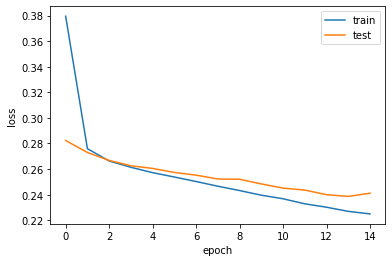

In [ ]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [ ]:
# 정확도
score = model.evaluate(X_test,y_test)
print("loss, accuracy : ",score)

1562/1562 [==============================] - 40s 26ms/step - loss: 0.2411 - accuracy: 0.9105
loss, accuracy :  [0.2411159723997116, 0.910498857498169]


In [ ]:
# model불러오기
loaded_model = keras.models.load_model('coupang-lstm.h5') 

In [ ]:
# 데이터 전처리 함수
def txt_predict(new_sentence):
    # 1. 한글 처리
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣]','',new_sentence)
    # 2. 형태소분석
    new_sentence = okt.morphs(new_sentence,stem=True)
    # 3. 불용어 제거
    new_sentence = [word for word in new_sentence if not word in stopwords]
    # 4. 단어를 번호로 변경
    encoded = tokenizer.texts_to_sequences([new_sentence])
    # 5. 패딩
    pad_new = pad_sequences(encoded,maxlen=30)
    # 6. 예측
    score = float(loaded_model.predict(pad_new))
    print(score)
    if(score>0.3):
        print('{:.2f}% 확률로 긍정 리뷰입니다.'.format(score*100))
    else:
        print('{:.2f}% 확률로 부정 리뷰입니다.'.format((1-score)*100))


In [ ]:
# 1개를 입력받음
txt = '좋아요'
txt_predict(txt)

0.7618016004562378
76.18% 확률로 긍정 리뷰입니다.


In [ ]:
문장 줄이고 수 맞추기

SyntaxError: ignored